# Решающие деревья, random forest

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
X, target = load_iris(as_frame=True, return_X_y=True)
# для визуализации
data = X.copy()
data['spec'] = target

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

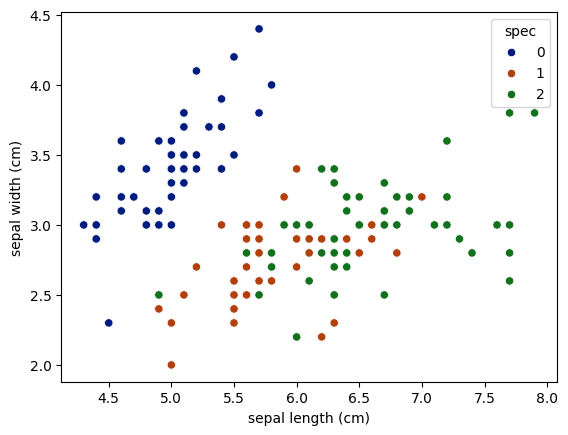

In [3]:
sns.scatterplot(data=data, x='sepal length (cm)', y='sepal width (cm)', hue='spec', palette='dark')

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

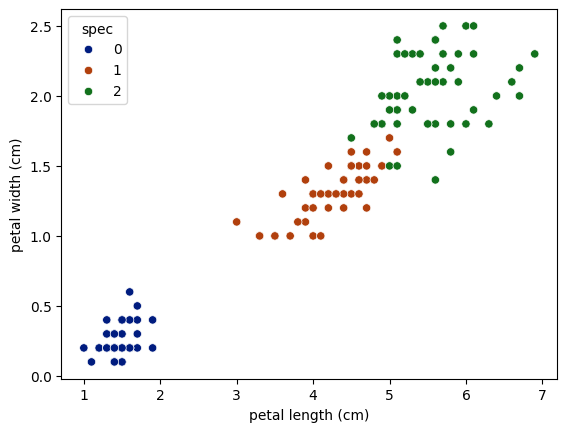

In [4]:
sns.scatterplot(data=data, x='petal length (cm)', y='petal width (cm)', hue='spec', palette='dark')

In [5]:
X, y = data.iloc[:, :2].values, target.values

# Логистическая регрессия

In [6]:
from matplotlib import colormaps

In [7]:
cmap = colormaps.get_cmap('rainbow')

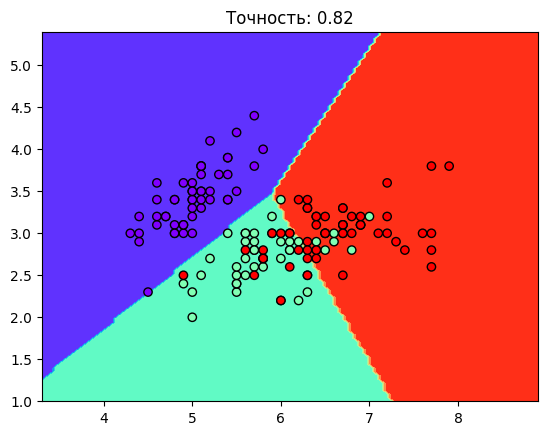

In [9]:
model = LogisticRegression()
model.fit(X, y)

disp = DecisionBoundaryDisplay.from_estimator(model, X, response_method="predict", cmap=cmap)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=cmap)

plt.title(f"Точность: {accuracy_score(y, model.predict(X)):.2}")
plt.show()

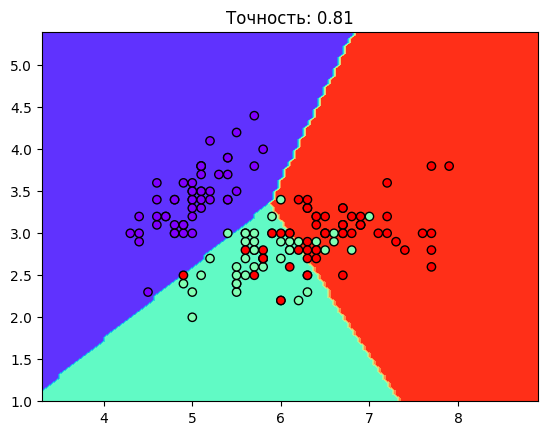

In [11]:
# увеличим вес регуляризации

model = LogisticRegression(C=0.1)
model.fit(X, y)

disp = DecisionBoundaryDisplay.from_estimator(model, X, response_method="predict",cmap=cmap)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k",cmap=cmap)

plt.title(f"Точность: {accuracy_score(y, model.predict(X)):.2}")
plt.show()


# Метод K-ближайших соседей

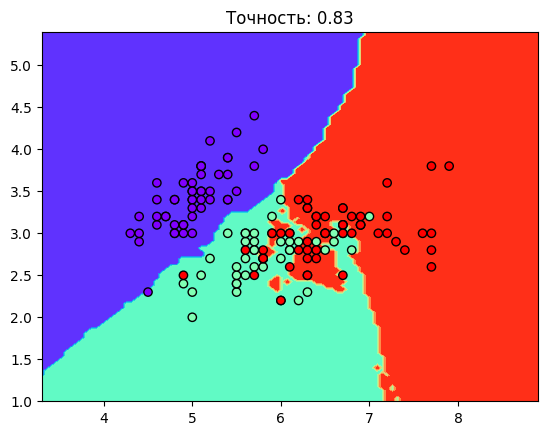

In [13]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X, y)

disp = DecisionBoundaryDisplay.from_estimator(model, X, response_method="predict",cmap=cmap)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k",cmap=cmap)

plt.title(f"Точность: {accuracy_score(y, model.predict(X)):.2}")
plt.show()


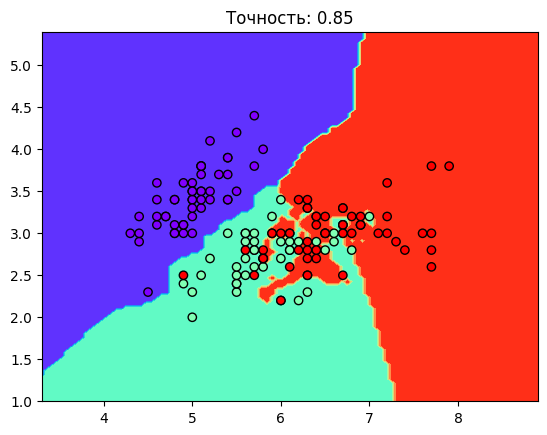

In [15]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)

disp = DecisionBoundaryDisplay.from_estimator(model, X, response_method="predict",cmap=cmap)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k",cmap=cmap)

plt.title(f"Точность: {accuracy_score(y, model.predict(X)):.2}")
plt.show()


# Кросс-валидация


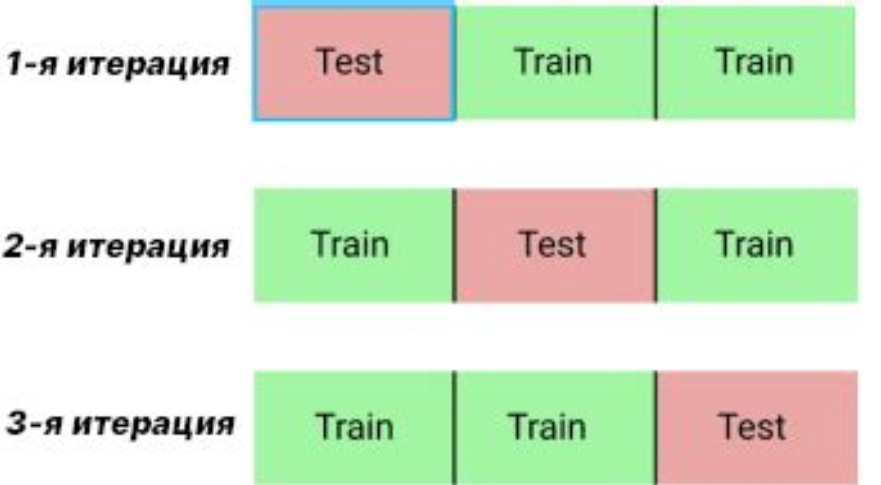

In [16]:
model = LogisticRegression()

cvs = cross_val_score(model, X, y, cv=3)

print(cvs)
print(np.mean(cvs))

[0.78 0.84 0.84]
0.82


# Как выбрать лучшие гиперпараметры?

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

# scorer = make_scorer(accuracy_score, greater_is_better=True)

search = GridSearchCV(KNeighborsClassifier(),
             [{'n_neighbors': [1, 2, 3, 5, 6, 9, 12, 15],
               'weights': ['uniform', 'distance']}],
             scoring='accuracy',
             cv=5,
             verbose=2,
             n_jobs=1) # n_jobs=-1 to run in parallel

search.fit(X, y)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=2, wei

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid=[{'n_neighbors': [1, 2, 3, 5, 6, 9, 12, 15],
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy', verbose=2)

In [22]:
print(search.best_params_)
print(search.best_score_)
print(search.best_estimator_)

{'n_neighbors': 6, 'weights': 'uniform'}
0.7933333333333333
KNeighborsClassifier(n_neighbors=6)


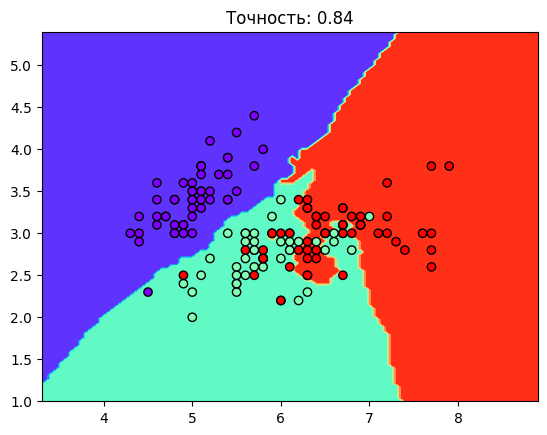

In [24]:
disp = DecisionBoundaryDisplay.from_estimator(search.best_estimator_, X, response_method="predict",cmap=cmap)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=cmap)

plt.title(f"Точность: {accuracy_score(y, search.best_estimator_.predict(X)):.2}")
plt.show()

# Решающие деревья

In [16]:
import pandas as pd

## Выдавать ли кредит?
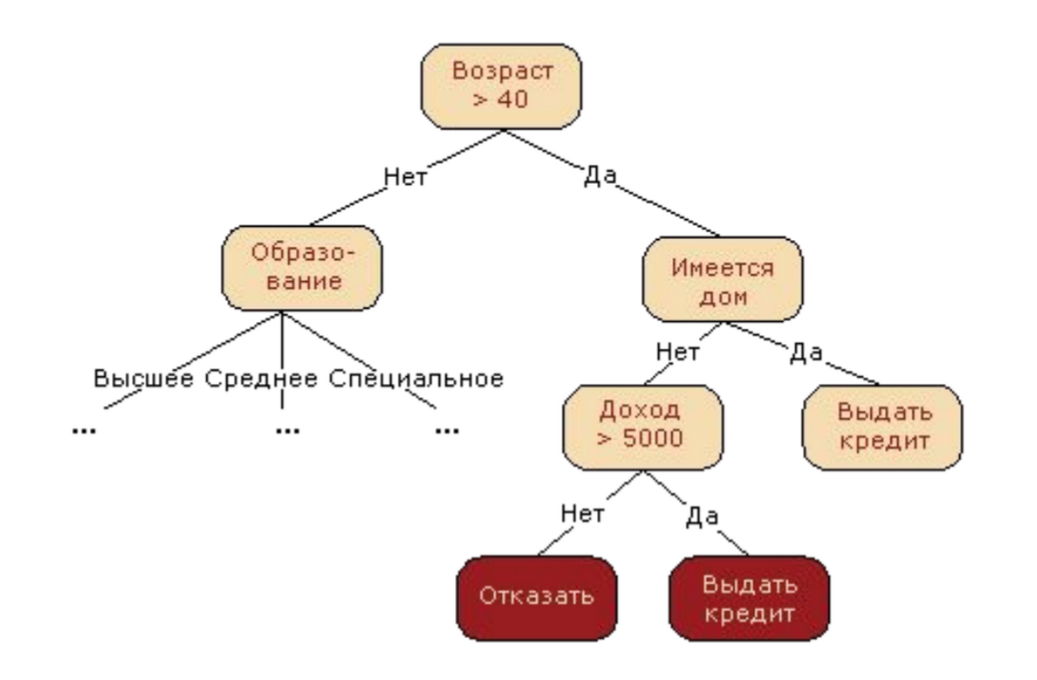

Посмотрим на некоторую выборку. Наша задача научиться определять фигуры, внутри которых написана единица.  
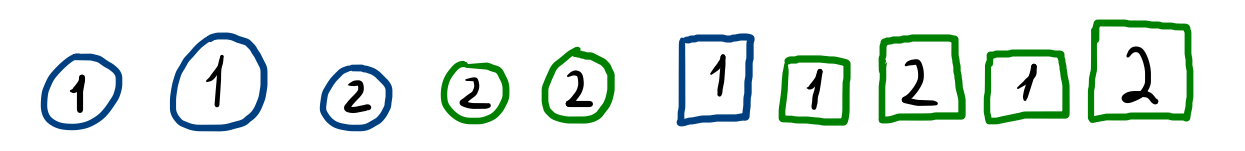

In [25]:
df = pd.DataFrame({"форма":['круг','круг','круг','круг','круг', 'квадрат','квадрат','квадрат','квадрат','квадрат'],
                    "цвет":['синий', 'синий', 'синий', 'зелёный','зелёный','синий','зелёный','зелёный','зелёный','зелёный', ],
                    "цифра":[1, 1, 1, 2, 2, 1, 1, 2, 2, 2]})
df

форма     цвет  цифра
0     круг    синий      1
1     круг    синий      1
2     круг    синий      1
3     круг  зелёный      2
4     круг  зелёный      2
5  квадрат    синий      1
6  квадрат  зелёный      1
7  квадрат  зелёный      2
8  квадрат  зелёный      2
9  квадрат  зелёный      2

Пример конкретного решающего дерева:  
    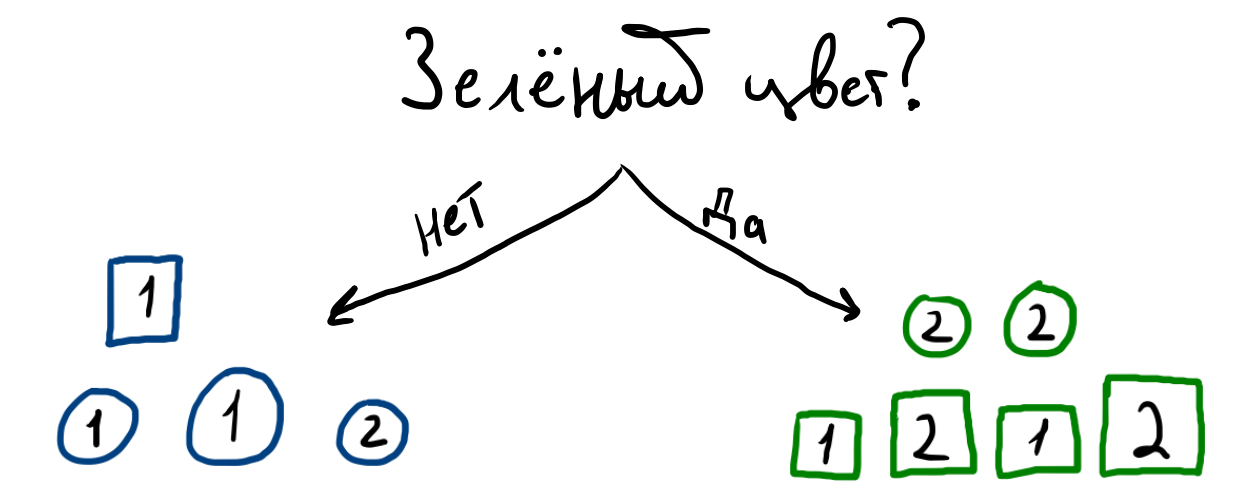

Продолжаем ветвить:  
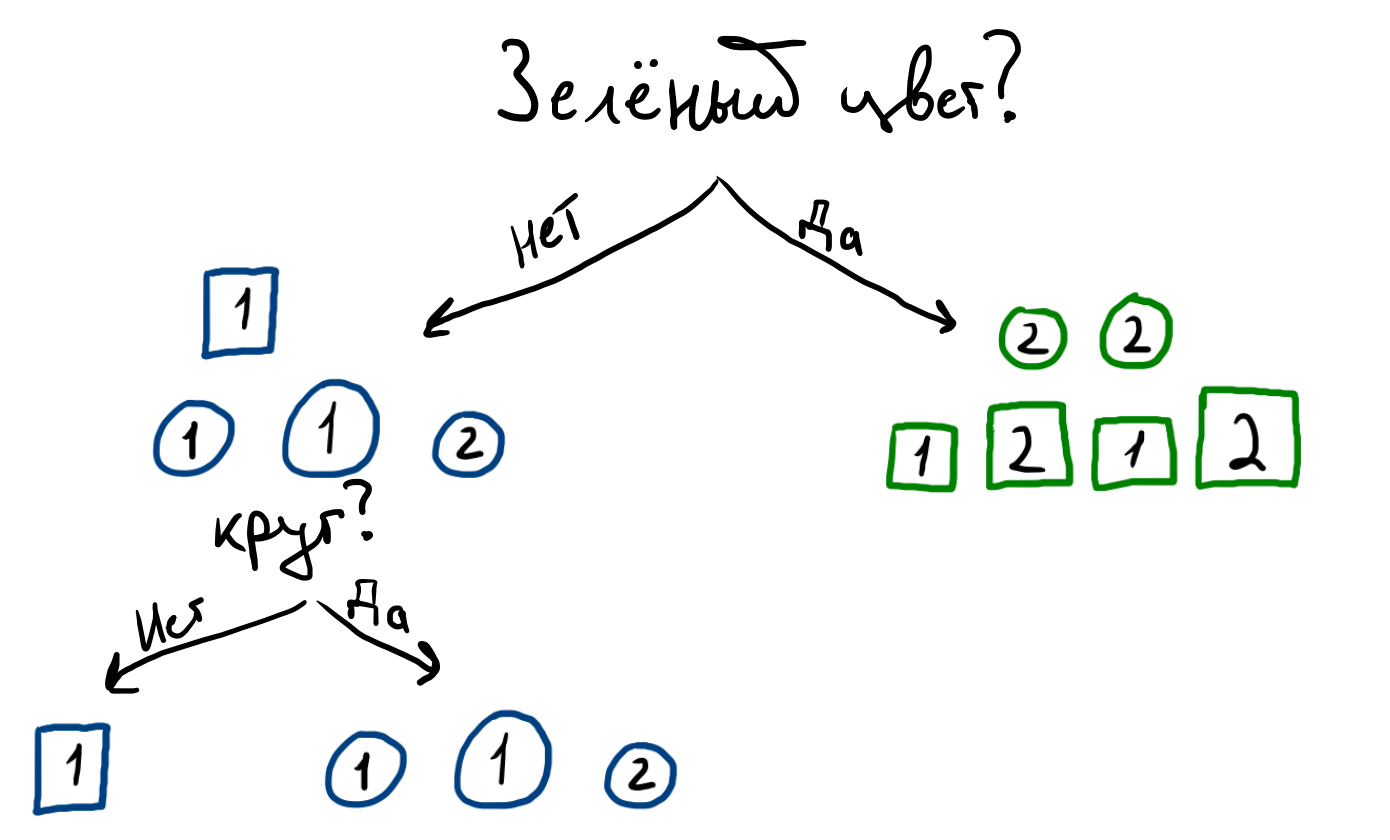

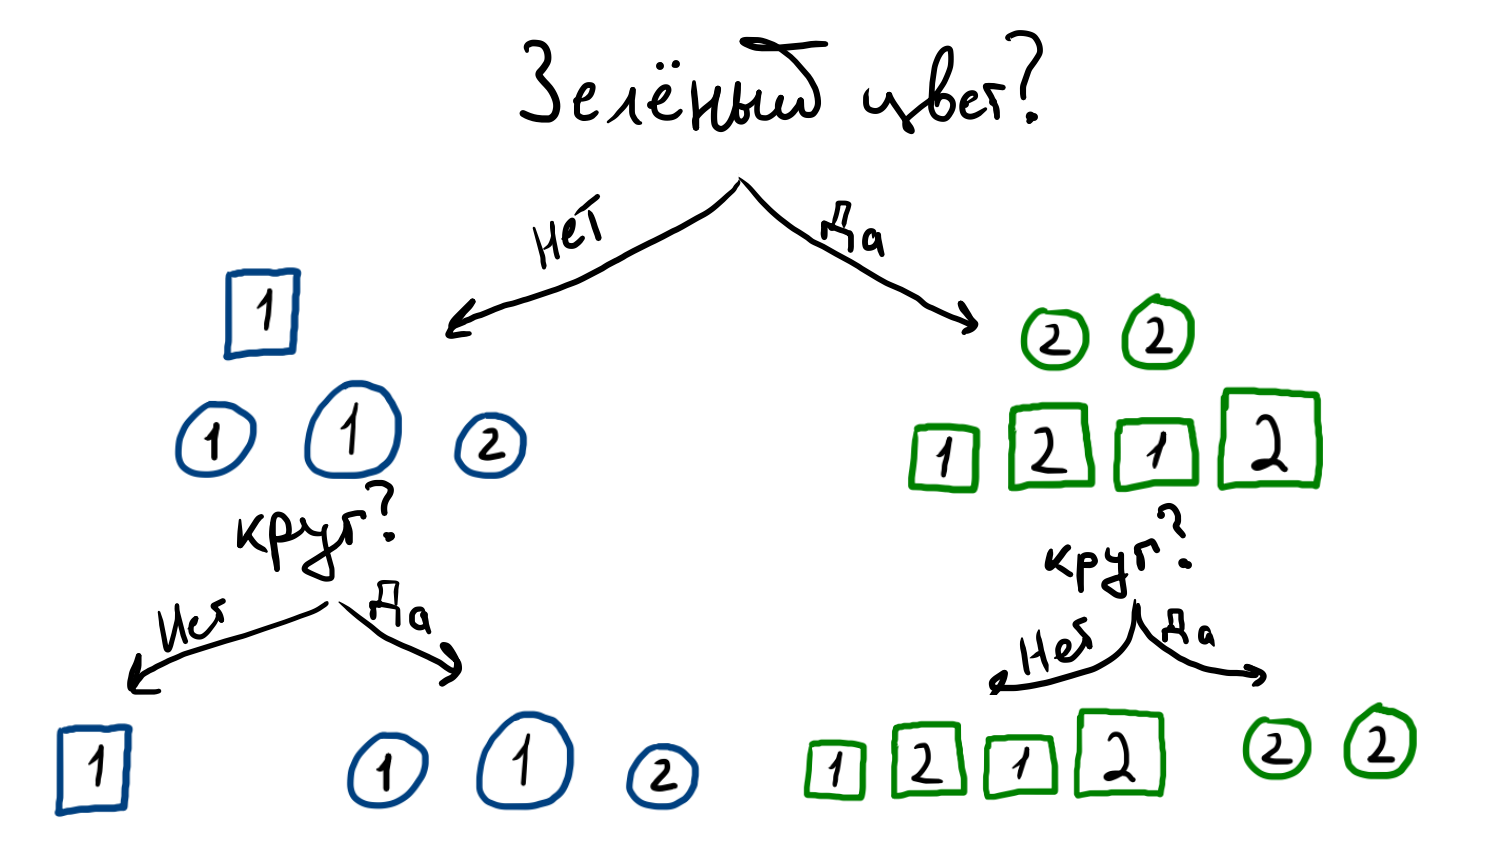

# До какого момента ветвиться?
* Пока не будет достигнута установленна в начале глубина дерева;  
* Пока в листе не останется один компонент;  
* Пока все элементы листа не станут одного типа;  
* Пока число элементов в листе не станет меньше установленного порога;  
* **Пока "выигрыш" в информации не станет меньше установленного порога;**   

## Энтропия и информационный выигрыш

Остановимся на этом делении (сплит).  
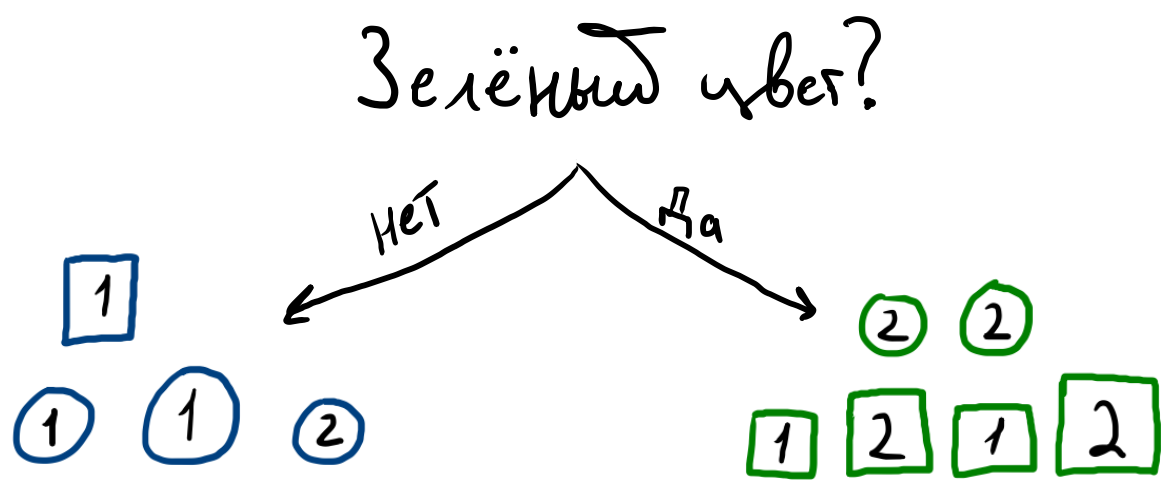

Как оценить, хорошее ли оно ?

Введём следующую функцию:  
<img src="https://www.saedsayad.com/images/Entropy_3.png" width=50% />

In [26]:
-(9/14*np.log2(9/14)) - (5/14*np.log2(5/14))

0.9402859586706311

In [27]:
-(7/14*np.log2(7/14)) - (7/14*np.log2(7/14))

1.0

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def custom_log(x: float) -> float:
    """Доопределённый в нуле двоичный логарифм"""
    return 0 if x == 0 else np.log2(x)

def entropy(*args):
    """
    Один аргумент -- доля объектов положительного класса.
    Два аргумента -- число объектов положительного и отрицательного классов.
    """
    if len(args) == 1:
        if args[0] == 0: # доопределим в нуле, чтобы не ломался логарифм
            return 0
        p_plus = args[0]
        p_minus = 1 - p_plus
    else:
        args = np.array(args)
        args = args / np.sum(args) # нормировка
        p_plus = args[0]
        p_minus = args[1] if args[1] != 1 else 1e-6
        
    return -p_plus * custom_log(p_plus) - p_minus * custom_log(p_minus)

In [29]:
entropy(5, 9) # проверим

0.9402859586706311

In [30]:
entropy(5/ (5+9)) # то же самое

0.9402859586706311

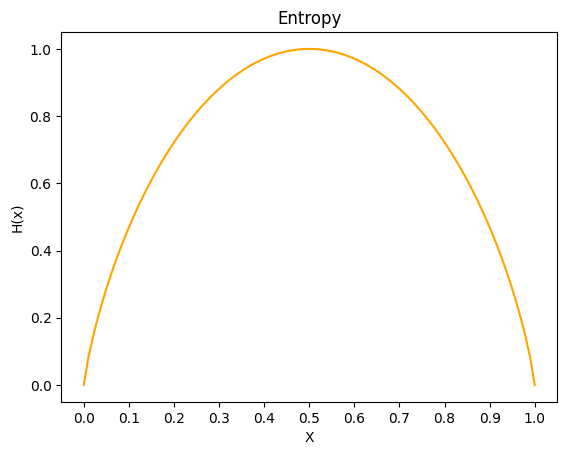

In [32]:
# Построим график энтропии для "дроби" от 0 до 1
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 100)
y = np.array([entropy(i) for i in x])

plt.plot(x, y, c='orange')
plt.title('Entropy')
plt.ylabel("H(x)")
plt.xlabel("X")
plt.xticks(np.linspace(0, 1, 11))

plt.show()

Если смотреть на отношение единиц к двойкам, то посчитаем значение энтропии для этой группы:  
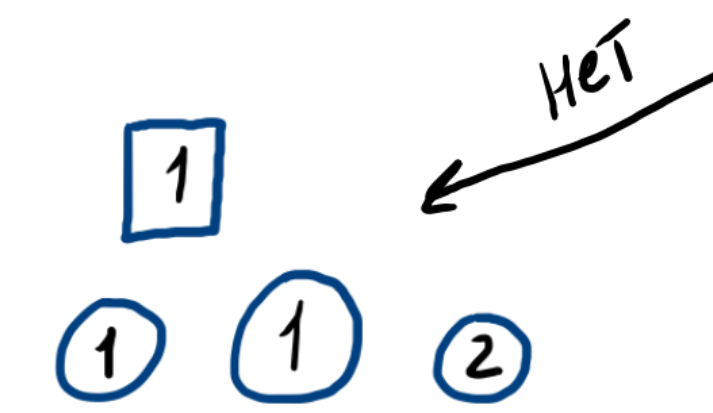

In [33]:
entropy(3, 1)

0.8112781244591328

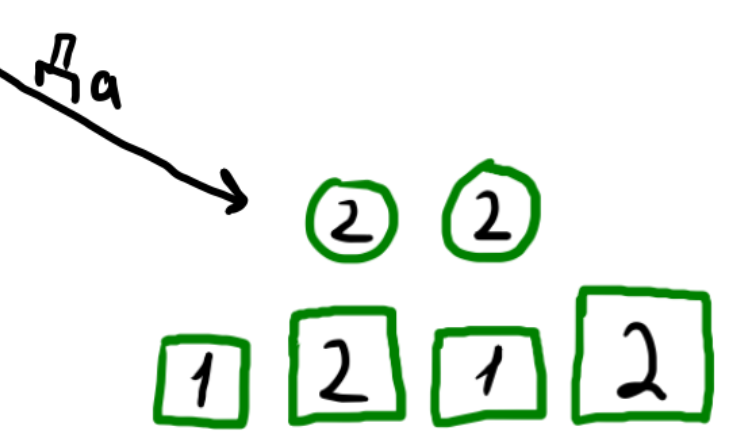  

In [34]:
entropy(2, 4)

0.9182958340544896

Посчитаем средневзвешенную энтропию:  

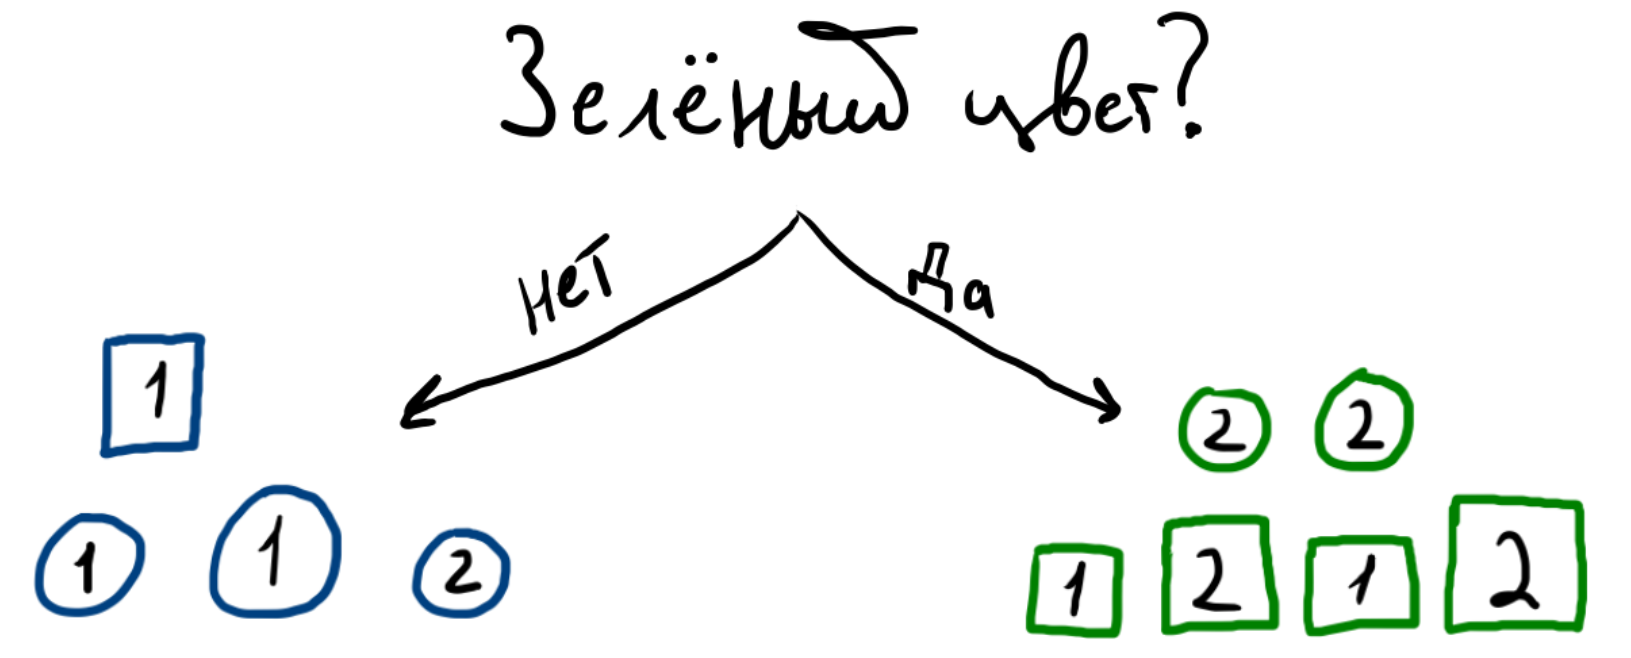

In [35]:
H = 4/10 * entropy(3, 1) + 6/10 * entropy(2, 4) # взвесим на число элементов в новых узлых
H

0.8754887502163469

## Information gain (выигрыш в информации)

Посчитаем, какая была энтропия ДО разбиения и какой она стала (средневзвешенная) после разбиения:  
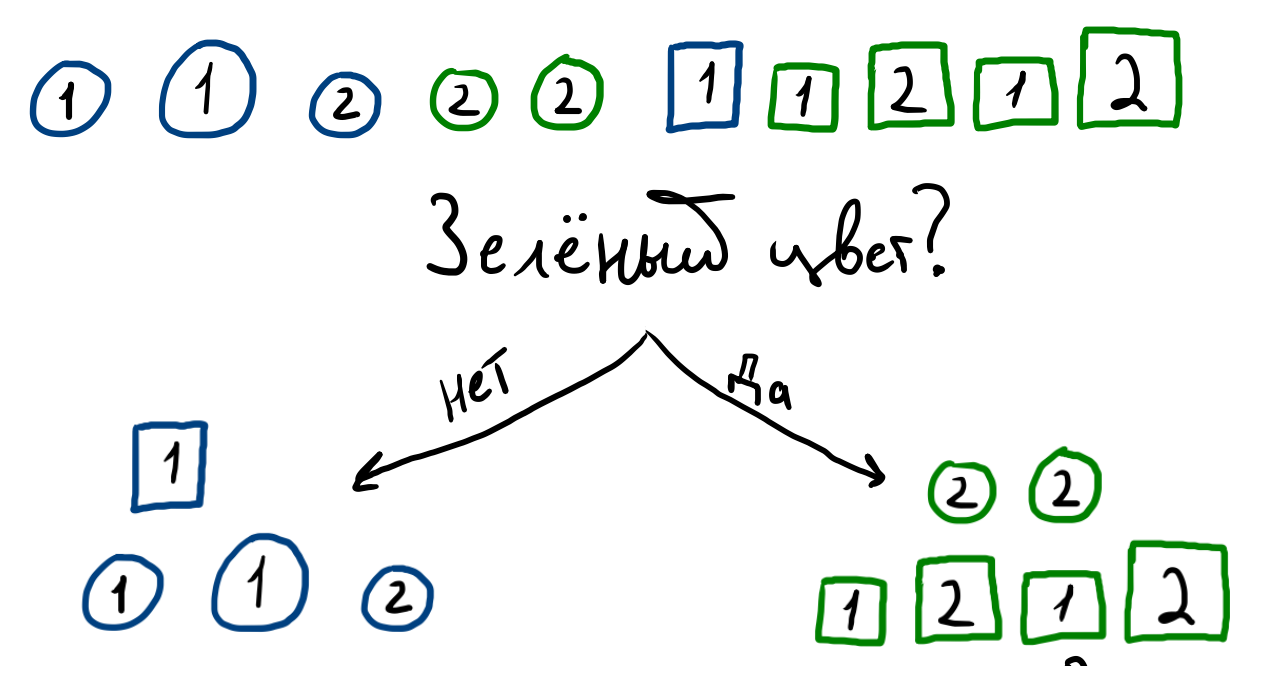


$$ Information Gain = H(p_+, p_-) - (weight^{left}\cdot H(p_+^{left}, p_-^{left}) + weight^{right}\cdot H(p_+^{right}, p_-^{right})) $$

In [36]:
entropy(5, 5) - (4/10 * entropy(3, 1) + 6/10 * entropy(2, 4)) # выигрыш в информации

0.12451124978365313

Посчитаем выигрыш на этом шаге:  

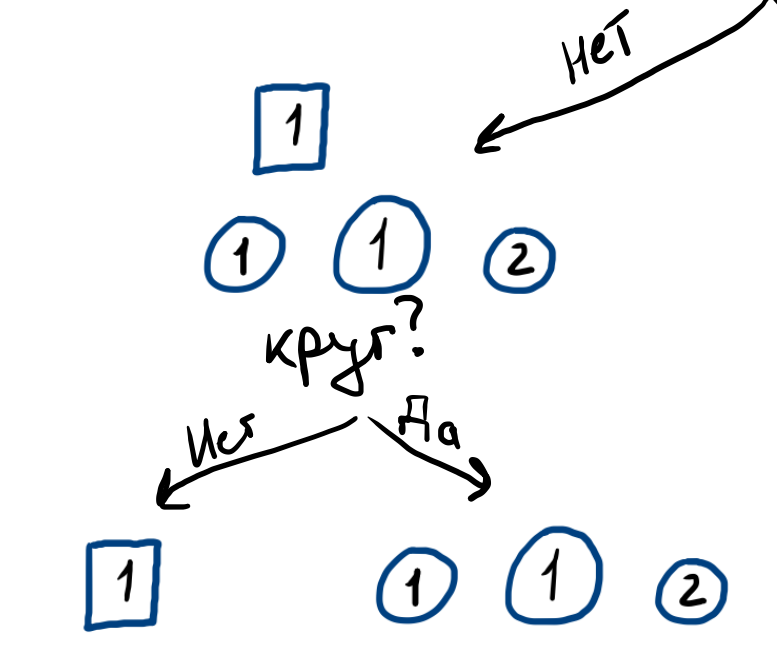

In [37]:
entropy(3, 1) - (1/4 * entropy(1, 0) + 3/4 * entropy(2, 1)) # выигрыш в информации

0.12255624891826566

И для этого:  

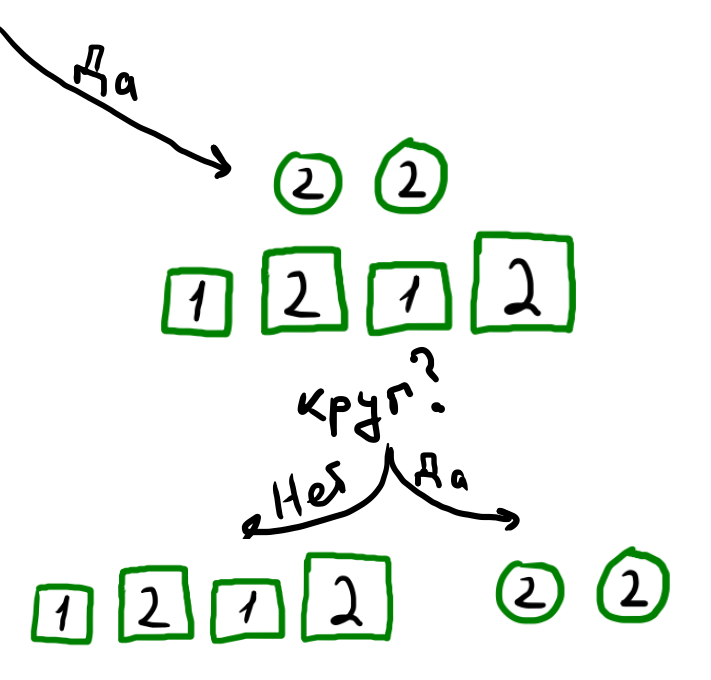

In [38]:
entropy(2, 4) - (4/6 * entropy(2, 2) + 2/6 * entropy(0, 2)) # выигрыш в информации

0.25162252353163317

## Что делать с числовыми переменными?

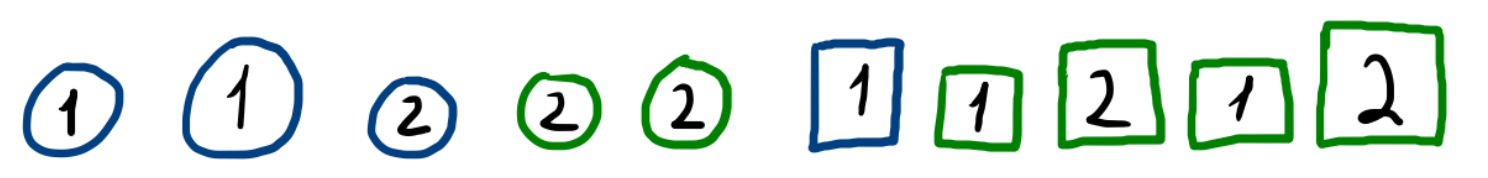

In [40]:
df = pd.DataFrame({"форма":['круг','круг','круг','круг','круг',       'квадрат','квадрат','квадрат','квадрат','квадрат'],
                    "цвет":['синий', 'синий', 'синий', 'зелёный','зелёный',    'синий','зелёный','зелёный','зелёный','зелёный', ],
                    "цифра":[1, 1, 2, 2, 2, 1, 1, 2, 1, 2],
                    "площадь":[4, 6.5, 3.5, 3, 3.75, 5, 4.5, 5.2, 4.75, 7]})
df

форма     цвет  цифра  площадь
0     круг    синий      1     4.00
1     круг    синий      1     6.50
2     круг    синий      2     3.50
3     круг  зелёный      2     3.00
4     круг  зелёный      2     3.75
5  квадрат    синий      1     5.00
6  квадрат  зелёный      1     4.50
7  квадрат  зелёный      2     5.20
8  квадрат  зелёный      1     4.75
9  квадрат  зелёный      2     7.00

In [41]:
import seaborn as sns

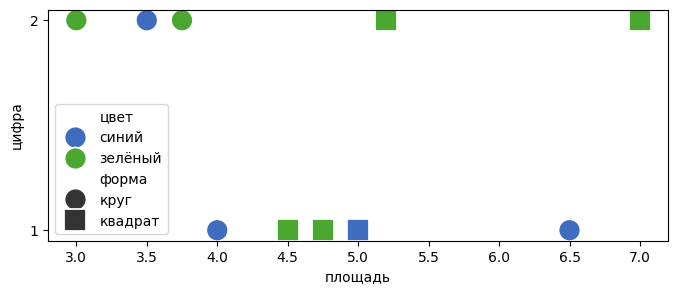

In [42]:
plt.figure(figsize=(8, 3))
sns.scatterplot(data=df, y='цифра', x='площадь', style='форма', hue='цвет', 
                palette=['#3e6dbf','#4AA72F'], s=250,
               markers = {"круг": "o", "квадрат": "s"}
               )
plt.yticks(ticks=[1, 2], labels=[1,2])
plt.show()

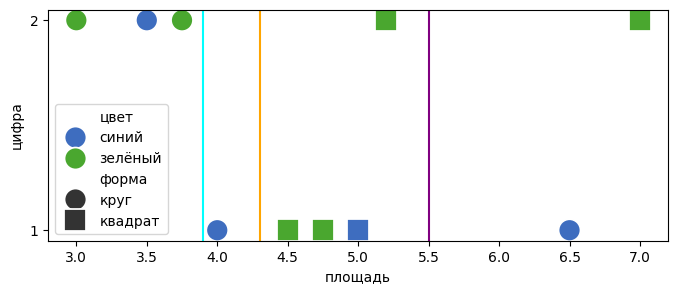

In [33]:
plt.figure(figsize=(8, 3))
sns.scatterplot(data=df, y='цифра', x='площадь', style='форма', hue='цвет', 
                palette=['#3e6dbf','#4AA72F'], s=250,
               markers = {"круг": "o", "квадрат": "s"})

plt.yticks(ticks=[1, 2], labels=[1,2])
plt.axvline(3.9, c='cyan')
plt.axvline(4.3, c='orange')
plt.axvline(5.5, c='purple')
plt.show()

In [43]:
# посчитайте information gain для разбиения по оранжевой линии 
entropy(5, 5) - (4/10 * entropy(3, 1) + 6/10 * entropy(2, 4))

0.12451124978365313

In [44]:
# посчитайте information gain для разбиения по фиолетовой линии 
entropy(5, 5) - (8/10 * entropy(4, 4) + 2/10 * entropy(1, 1))

0.0

In [45]:
# по циановой линии
entropy(5, 5) - (3/10 * entropy(3, 0) + 7/10 * entropy(2, 5))

0.3958156020033583

In [37]:
# какой сплит лучше?


In [52]:
X, y = data.iloc[:, :2].values, target.values

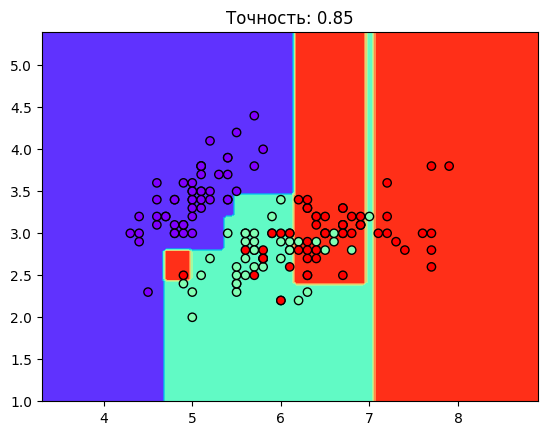

In [93]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(max_depth=5)

tree.fit(X, y)

disp = DecisionBoundaryDisplay.from_estimator(tree, X, response_method="predict",cmap=cmap)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=cmap)

plt.title(f"Точность: {accuracy_score(y, tree.predict(X)):.2}")
plt.show()

In [78]:
%%capture
fig = plt.figure(figsize=(100,20))
_ = plot_tree(tree, 
               #feature_names=X_train.columns,  
               #class_names=['normal', 'sus', 'pathological'],
               filled=True,
               proportion=True,
               fontsize=10)

fig.savefig('mytree.png')

# Случайный лес (Random forest)

<center><img src="https://almablog-media.s3.ap-south-1.amazonaws.com/image_25_7c3fa2cb6f.png" width=75% /></center>

Фрэнсис Гальтон в 1906 году посетил рынок, где проводилась некая лотерея для крестьян.
Их собралось около 800 человек, и они пытались угадать вес быка, который стоял перед ними. Бык весил 1198 фунтов. Ни один крестьянин не угадал точный вес быка, но если посчитать среднее от их предсказаний, то получим 1197 фунтов.  
Эту идею уменьшения ошибки применили и в машинном обучении.

Алгоритм построения случайного леса, состоящего из $\large N$ деревьев, выглядит следующим образом:

Для каждого $\large n = 1, \dots, N$ :  
* Сгенерировать выборку $\large X_n$ с помощью бутстрэпа;  
* Построить решающее дерево $\large b_n$ по выборке $\large X_n$:  
        — по заданному критерию мы выбираем лучший признак, делаем разбиение в дереве по нему и так до исчерпания выборки;  
        — дерево строится, пока в каждом листе не более $\large n_\text{min}$ объектов или пока не достигнем определенной высоты дерева;  
        — при каждом разбиении сначала выбирается $\large k$ случайных признаков из $\large n$ исходных,
            и оптимальное разделение выборки ищется только среди них (обычно $ k \approx \sqrt{n}$ для классификации и $k \approx \frac{n}{3}$).  


<img src="https://github.com/Yorko/mlcourse.ai/blob/main/img/bootstrap.jpg?raw=true" width=75%/>

Итоговое предсказание: $\large a(x) = \frac{1}{N}\sum_{i = 1}^N b_i(x)$

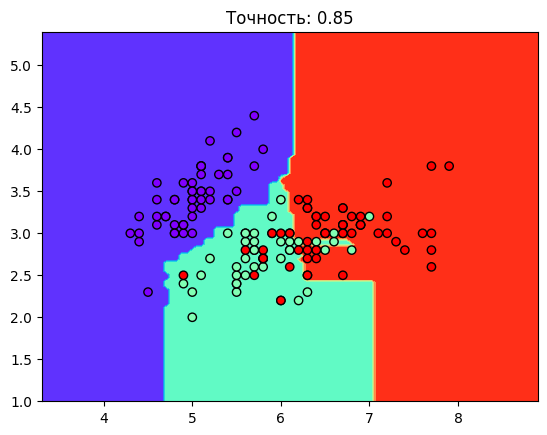

In [106]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth=5, n_estimators=100)

forest.fit(X, y)

disp = DecisionBoundaryDisplay.from_estimator(forest, X, response_method="predict",cmap=cmap)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=cmap)

plt.title(f"Точность: {accuracy_score(y, forest.predict(X)):.2}")
plt.show()

# Практика

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [109]:
df = pd.read_csv('./data/fetal_health.csv')
df.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

In [40]:
# baseline value: Baseline Fetal Heart Rate (FHR) (beats per minute)
# accelerations: Number of accelerations per second
# fetal_movement: Number of fetal movements per second
# uterine_contractions: Number of uterine contractions per second
# light_decelerations: Number of light decelerations (LDs) per second
# severe_decelerations: Number of severe decelerations (SDs) per second
# prolongued_decelerations: Number of prolonged decelerations (PDs) per second
# abnormal_short_term_variability: Percentage of time with abnormal short term variability
# mean_value_of_short_term_variability: Mean value of short term variability
# percentage_of_time_with_abnormal_long_term_variability: Percentage of time with abnormal long term variability
# mean_value_of_long_term_variability: Mean value of long term variability
# histogram_width: Width of histogram made using all values from a record
# histogram_min: Histogram minimum value
# histogram_max: Histogram maximum value
# histogram_number_of_peaks: Number of peaks in the exam histogram
# histogram_number_of_zeroes: Number of zeros in the exam histogram
# histogram_mode: Histogram mode
# histogram_mean: Histogram mean
# histogram_median: Histogram median
# histogram_variance: Histogram variance
# histogram_tendency: Histogram tendency
# fetal_health: Encoded as 1-Normal; 2-Suspect; 3-Pathological

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [111]:
df.describe().T

count        mean  \
baseline value                                      2126.0  133.303857   
accelerations                                       2126.0    0.003178   
fetal_movement                                      2126.0    0.009481   
uterine_contractions                                2126.0    0.004366   
light_decelerations                                 2126.0    0.001889   
severe_decelerations                                2126.0    0.000003   
prolongued_decelerations                            2126.0    0.000159   
abnormal_short_term_variability                     2126.0   46.990122   
mean_value_of_short_term_variability                2126.0    1.332785   
percentage_of_time_with_abnormal_long_term_vari...  2126.0    9.846660   
mean_value_of_long_term_variability                 2126.0    8.187629   
histogram_width                                     2126.0   70.445908   
histogram_min                                       2126.0   93.579492   
histogram_max                                       2126.0  164.025400   
histogram_number_of_peaks                           2126.0    4.068203   
histogram_number_of_zeroes                          2126.0    0.323612   
histogram_mode                                      2126.0  137.452023   
histogram_mean                                      2126.0  134.610536   
histogram_median                                    2126.0  138.090310   
histogram_variance                                  2126.0   18.808090   
histogram_tendency                                  2126.0    0.320320   
fetal_health                                        2126.0    1.304327   

                                                          std    min      25%  \
baseline value                                       9.840844  106.0  126.000   
accelerations                                        0.003866    0.0    0.000   
fetal_movement                                       0.046666    0.0    0.000   
uterine_contractions                                 0.002946    0.0    0.002   
light_decelerations                                  0.002960    0.0    0.000   
severe_decelerations                                 0.000057    0.0    0.000   
prolongued_decelerations                             0.000590    0.0    0.000   
abnormal_short_term_variability                     17.192814   12.0   32.000   
mean_value_of_short_term_variability                 0.883241    0.2    0.700   
percentage_of_time_with_abnormal_long_term_vari...  18.396880    0.0    0.000   
mean_value_of_long_term_variability                  5.628247    0.0    4.600   
histogram_width                                     38.955693    3.0   37.000   
histogram_min                                       29.560212   50.0   67.000   
histogram_max                                       17.944183  122.0  152.000   
histogram_number_of_peaks                            2.949386    0.0    2.000   
histogram_number_of_zeroes                           0.706059    0.0    0.000   
histogram_mode                                      16.381289   60.0  129.000   
histogram_mean                                      15.593596   73.0  125.000   
histogram_median                                    14.466589   77.0  129.000   
histogram_variance                                  28.977636    0.0    2.000   
histogram_tendency                                   0.610829   -1.0    0.000   
fetal_health                                         0.614377    1.0    1.000   

                                                        50%      75%      max  
baseline value                                      133.000  140.000  160.000  
accelerations                                         0.002    0.006    0.019  
fetal_movement                                        0.000    0.003    0.481  
uterine_contractions                                  0.004    0.007    0.015  
light_decelerations                                   0.000    0.003    0.015  
severe

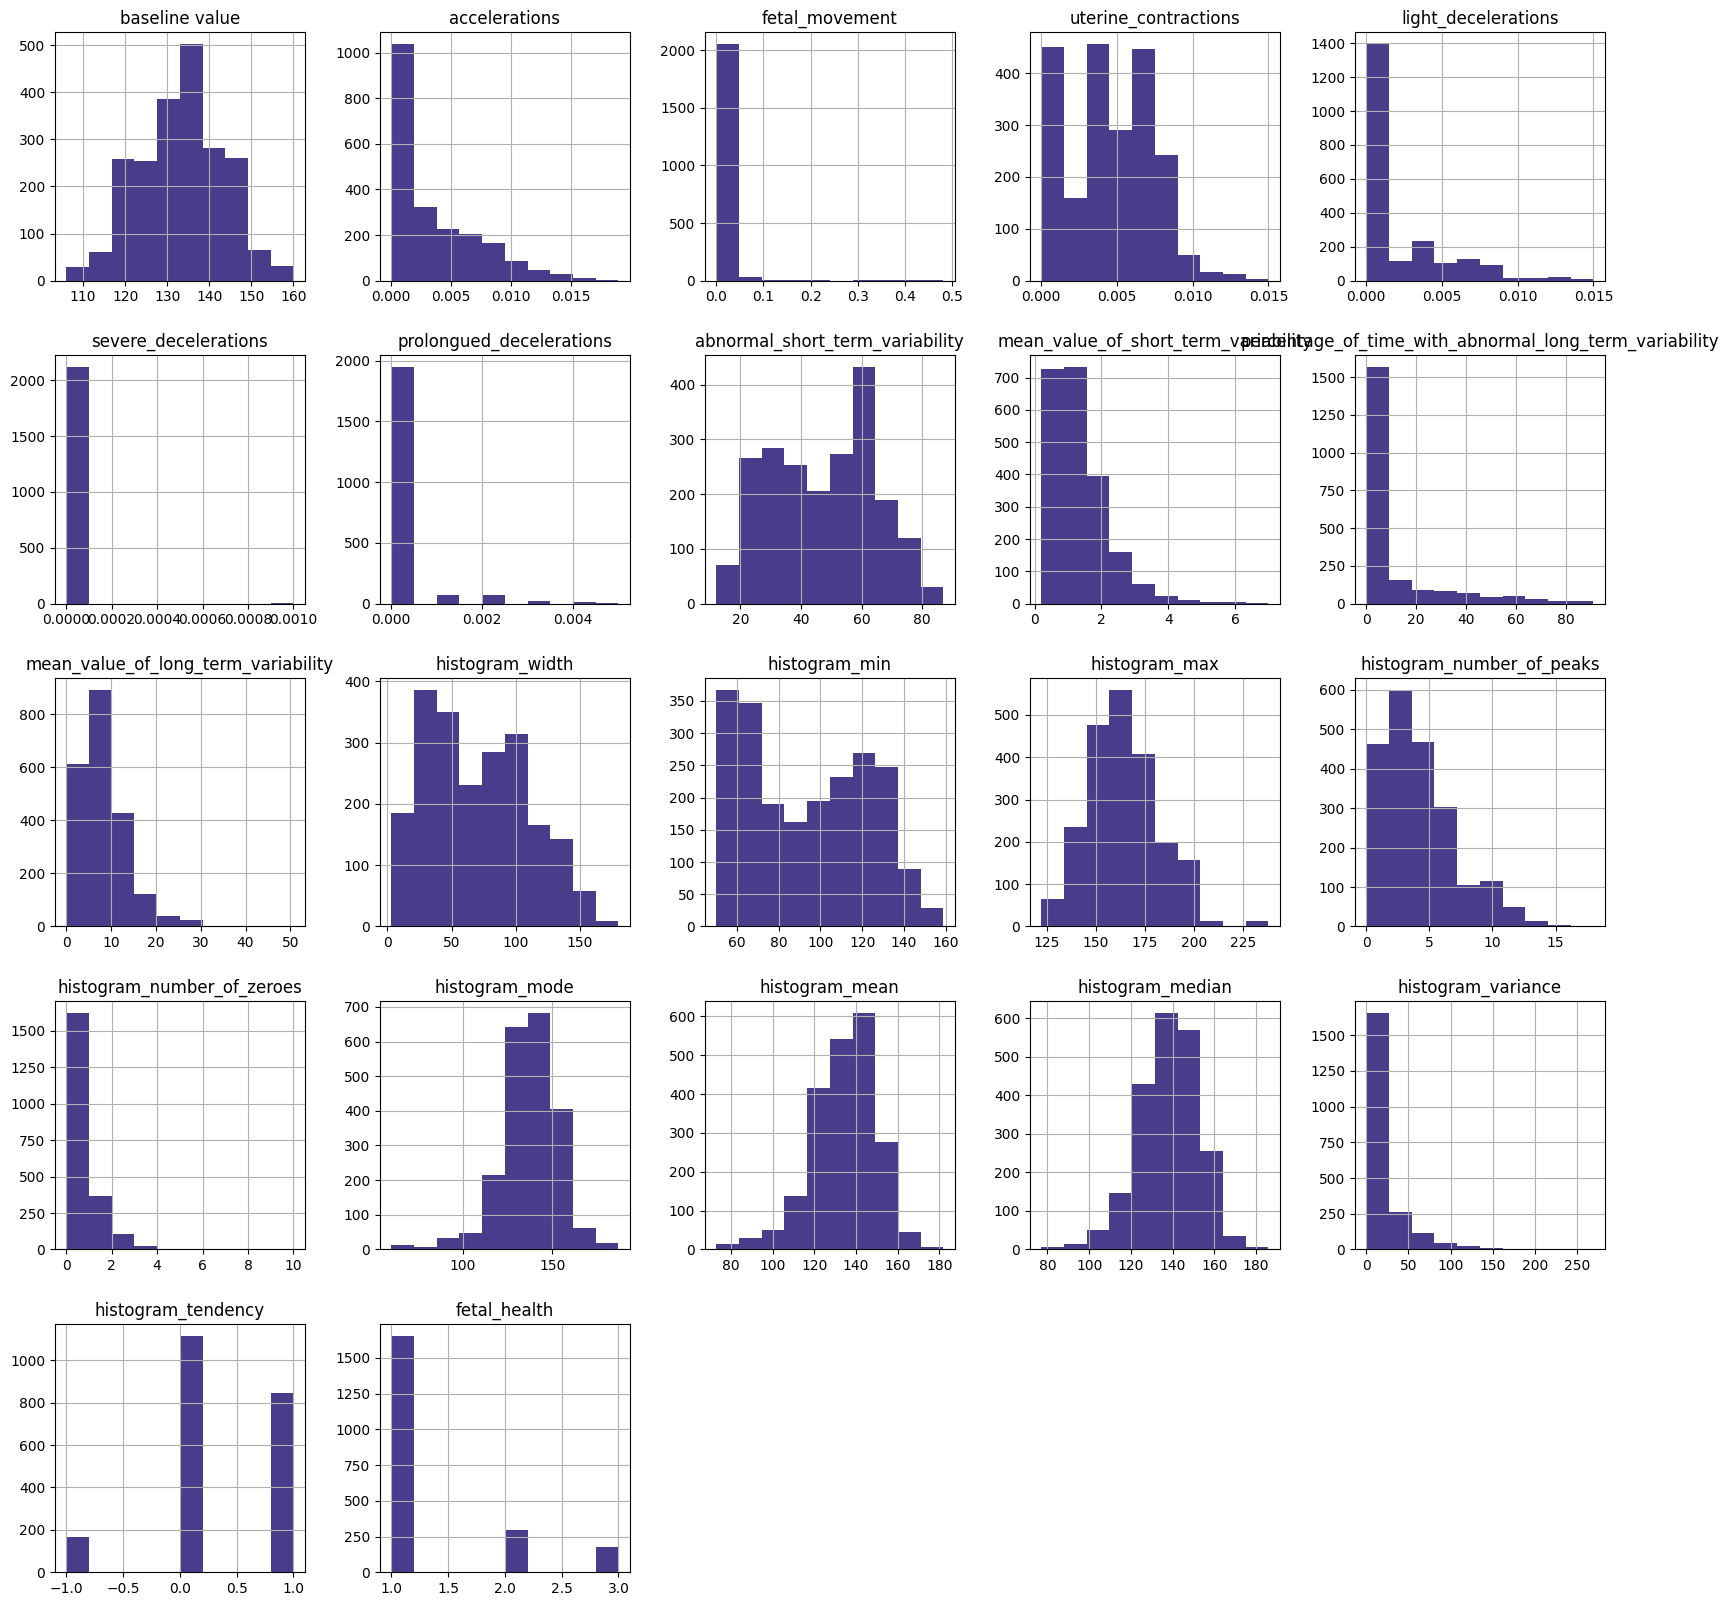

In [112]:
hist_plot = df.hist(figsize = (20,20), color = "#483D8B")

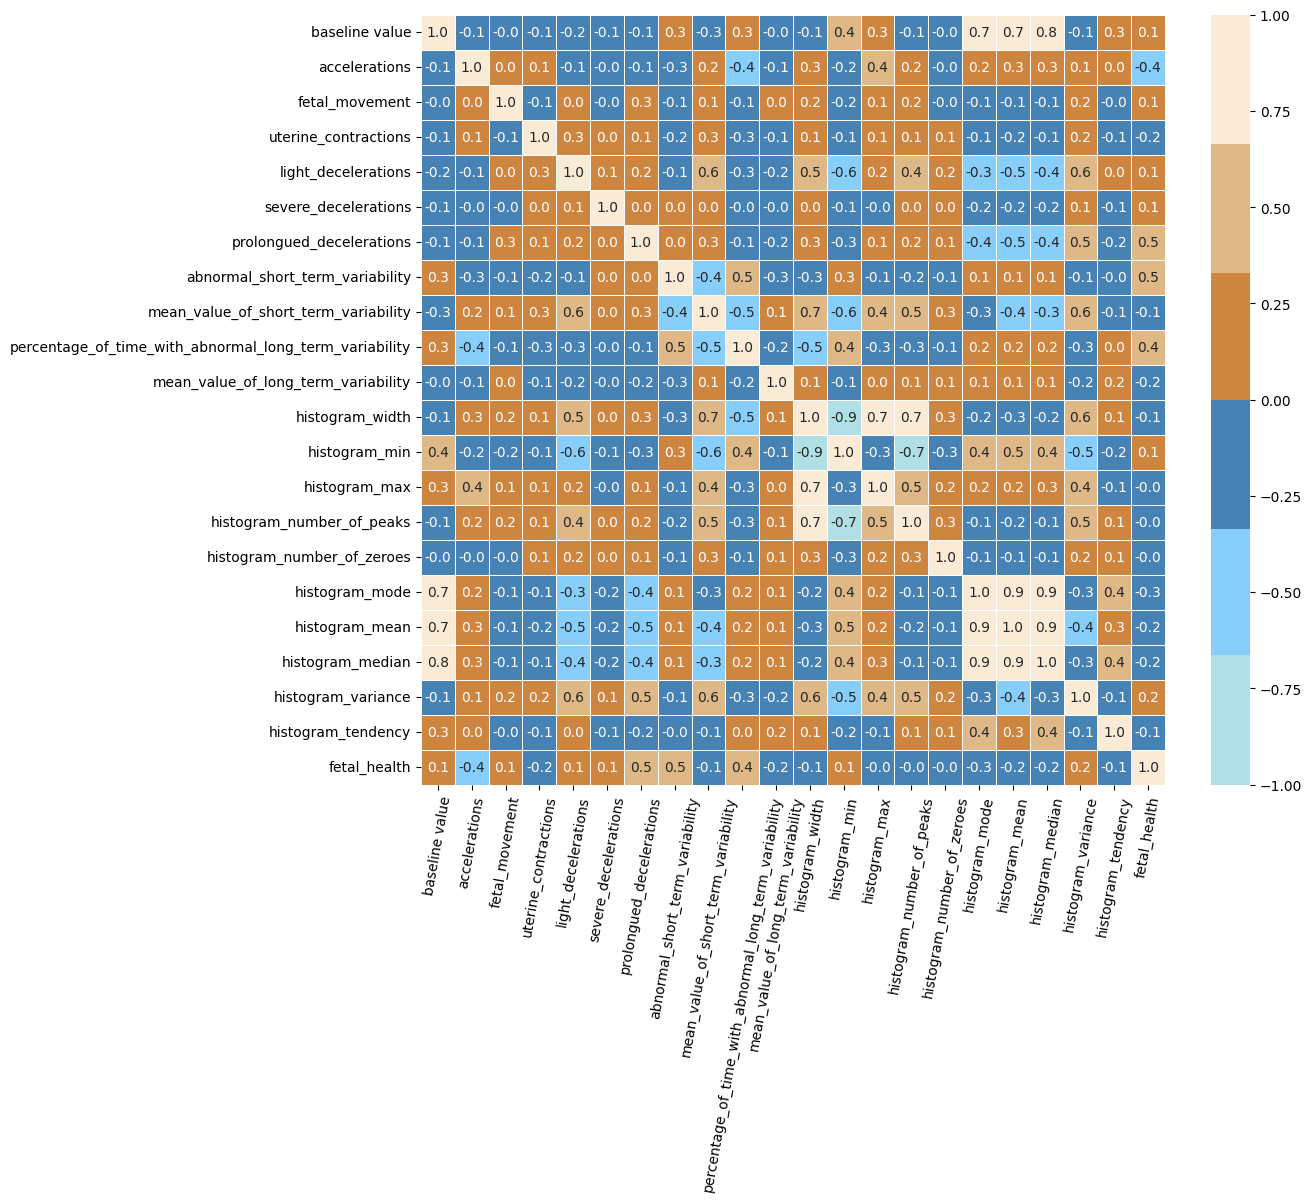

In [113]:
# cmap = sns.diverging_palette(205, 133, 63, as_cmap=True) # создает палитру между цветами

cols = (["#B0E0E6", "#87CEFA", "#4682B4", "#CD853F", "#DEB887", "#FAEBD7"])

corrmat= df.corr()

f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corrmat, cmap=cols, annot=True, linewidth=0.5, fmt='.1f', center=0, vmin=-1, vmax=1)
plt.xticks(rotation=80)
plt.show()

In [114]:
y = df["fetal_health"]
X = df.drop(["fetal_health"],axis=1)

In [115]:
from sklearn.preprocessing import StandardScaler

In [116]:
col_names = list(X.columns)
s_scaler = StandardScaler()
X_scaled = s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)  

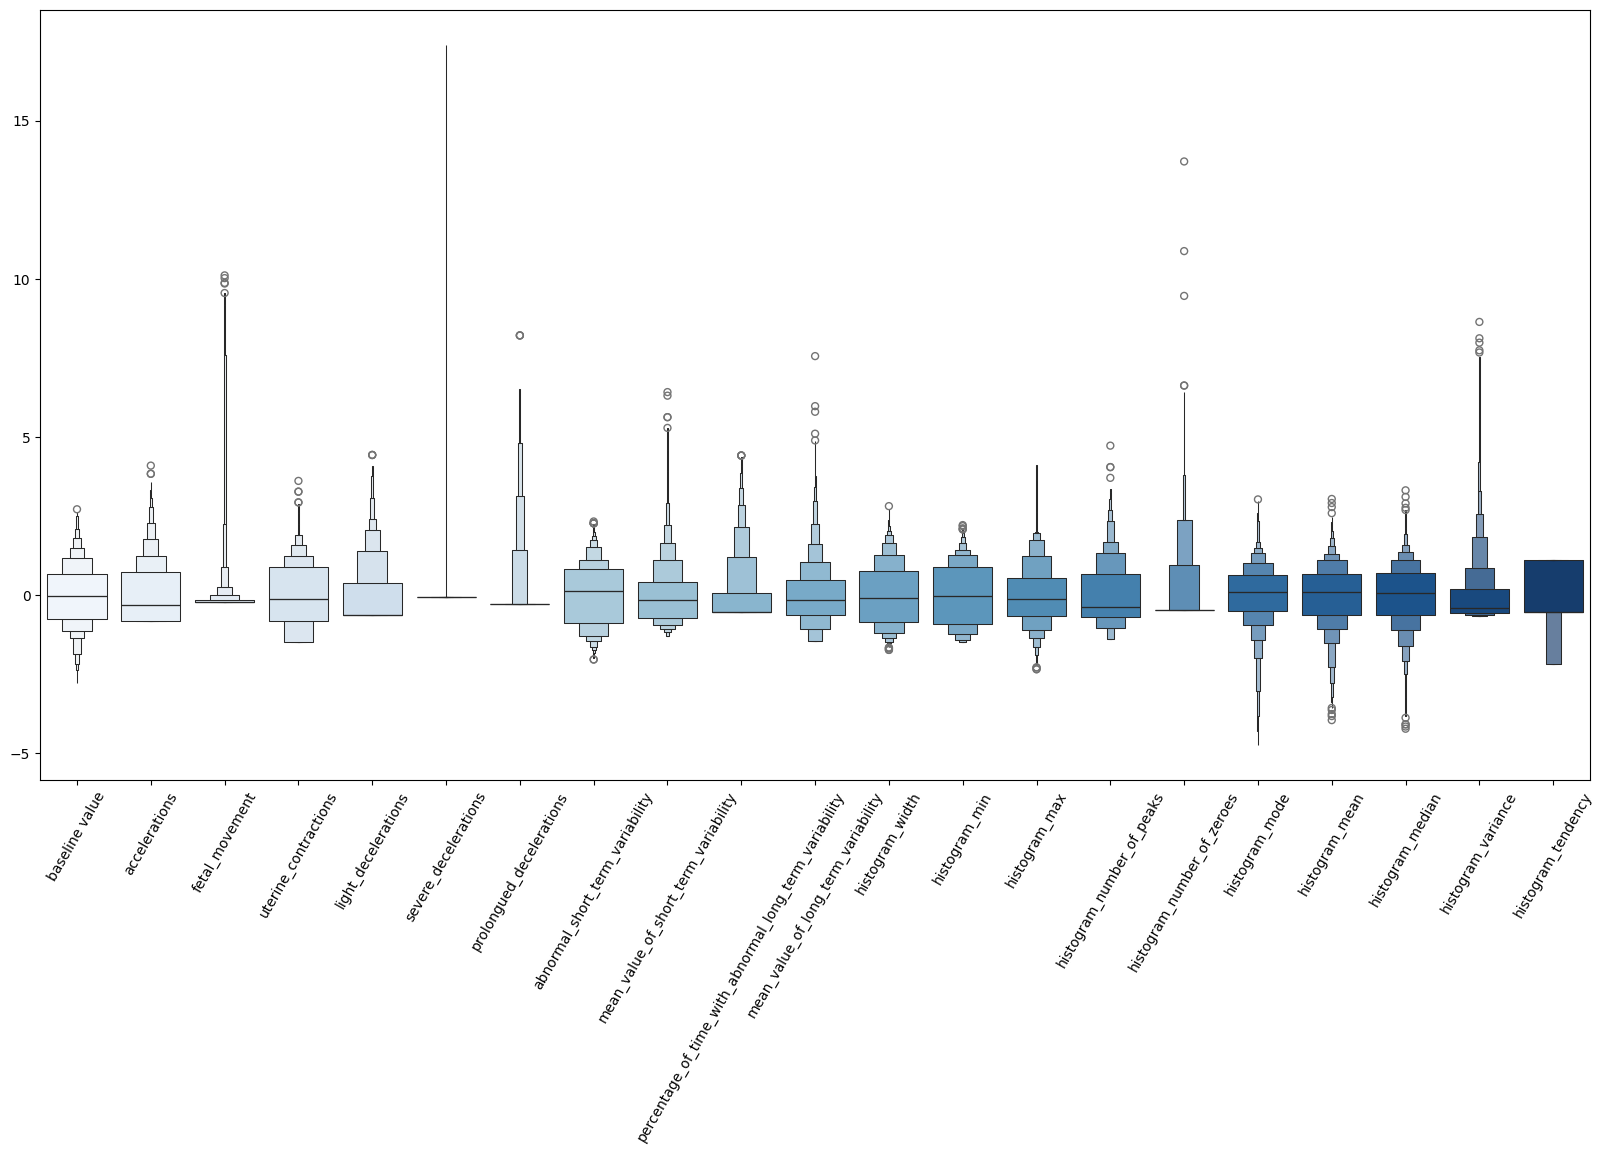

In [117]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_scaled,palette = 'Blues')
plt.xticks(rotation=60)
plt.show()

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=25)

In [124]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [120]:
y.value_counts()

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

In [129]:
models = {
    'knn':KNeighborsClassifier(), 
    'logreg': LogisticRegression(max_iter=2000), 
    'des_tree': DecisionTreeClassifier(),
    'random_forest': RandomForestClassifier(),
    'SVM': SVC()
}

for model_name, model in models.items():
    
    model.fit(X_train, y_train)
    print(model_name, round(accuracy_score(y_test, model.predict(X_test)), 4))

knn 0.885


C:\Users\igumn\miniforge3\envs\hock\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


logreg 0.8756
des_tree 0.9296
random_forest 0.9554
SVM 0.8216


In [130]:
from sklearn.metrics import f1_score, classification_report

In [131]:
f1_score(y_test, model.predict(X_test), average='weighted')

0.7962775903526179

In [133]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.84      0.97      0.90       324
         2.0       0.53      0.30      0.38        60
         3.0       0.94      0.40      0.57        42

    accuracy                           0.82       426
   macro avg       0.77      0.56      0.62       426
weighted avg       0.81      0.82      0.80       426



In [137]:
# добавим scaling

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.20, random_state=42)

for model_name, model in models.items():

    model.fit(X_train, y_train)
    print(model_name, round(accuracy_score(y_test, model.predict(X_test)), 4), round(accuracy_score(y_train, model.predict(X_train)), 4))

knn 0.9155 0.9312
logreg 0.8779 0.9076
des_tree 0.9296 1.0
random_forest 0.9531 1.0
SVM 0.9038 0.9347


## Визуализация обученного дерева

In [138]:
from sklearn import tree

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

accuracy_score(y_test, model.predict(X_test))

0.9178403755868545

In [140]:
# просто текст

text_representation = tree.export_text(model)
print(text_representation)

|--- feature_8 <= 0.55
|   |--- feature_9 <= 68.50
|   |   |--- feature_7 <= 59.50
|   |   |   |--- class: 1.0
|   |   |--- feature_7 >  59.50
|   |   |   |--- class: 2.0
|   |--- feature_9 >  68.50
|   |   |--- feature_3 <= 0.00
|   |   |   |--- class: 3.0
|   |   |--- feature_3 >  0.00
|   |   |   |--- class: 1.0
|--- feature_8 >  0.55
|   |--- feature_17 <= 108.50
|   |   |--- feature_13 <= 220.50
|   |   |   |--- class: 3.0
|   |   |--- feature_13 >  220.50
|   |   |   |--- class: 1.0
|   |--- feature_17 >  108.50
|   |   |--- feature_0 <= 142.50
|   |   |   |--- class: 1.0
|   |   |--- feature_0 >  142.50
|   |   |   |--- class: 1.0



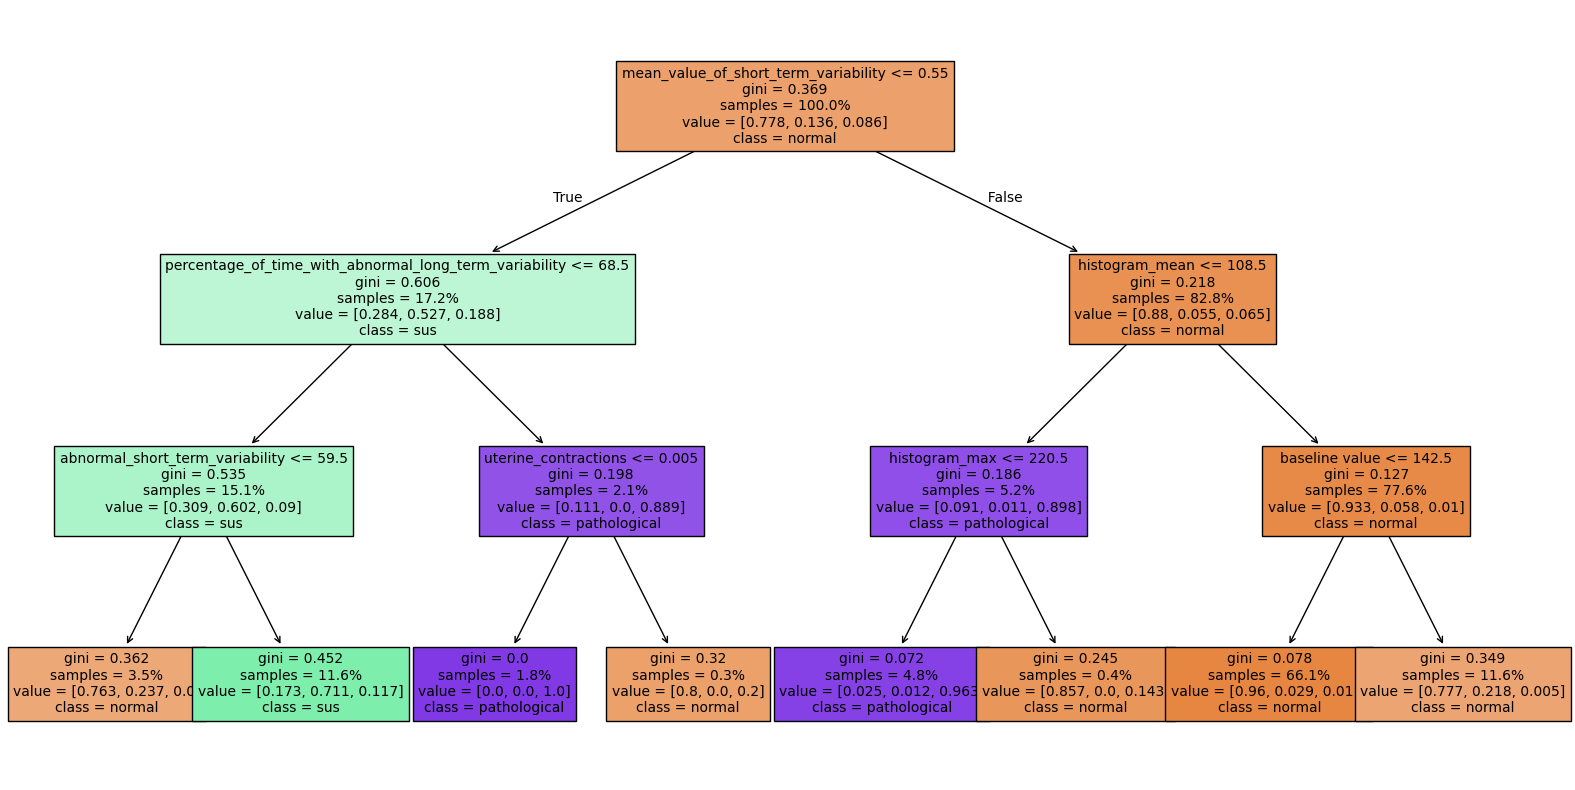

In [141]:
# лучше

fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(model, 
                   feature_names=X_train.columns,  
                   class_names=['normal', 'sus', 'pathological'],
                   filled=True,
                   proportion=True,
                   fontsize=10)


In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model = DecisionTreeClassifier(max_depth=5)

model.fit(X_train, y_train)

accuracy_score(y_test, model.predict(X_test))

0.931924882629108

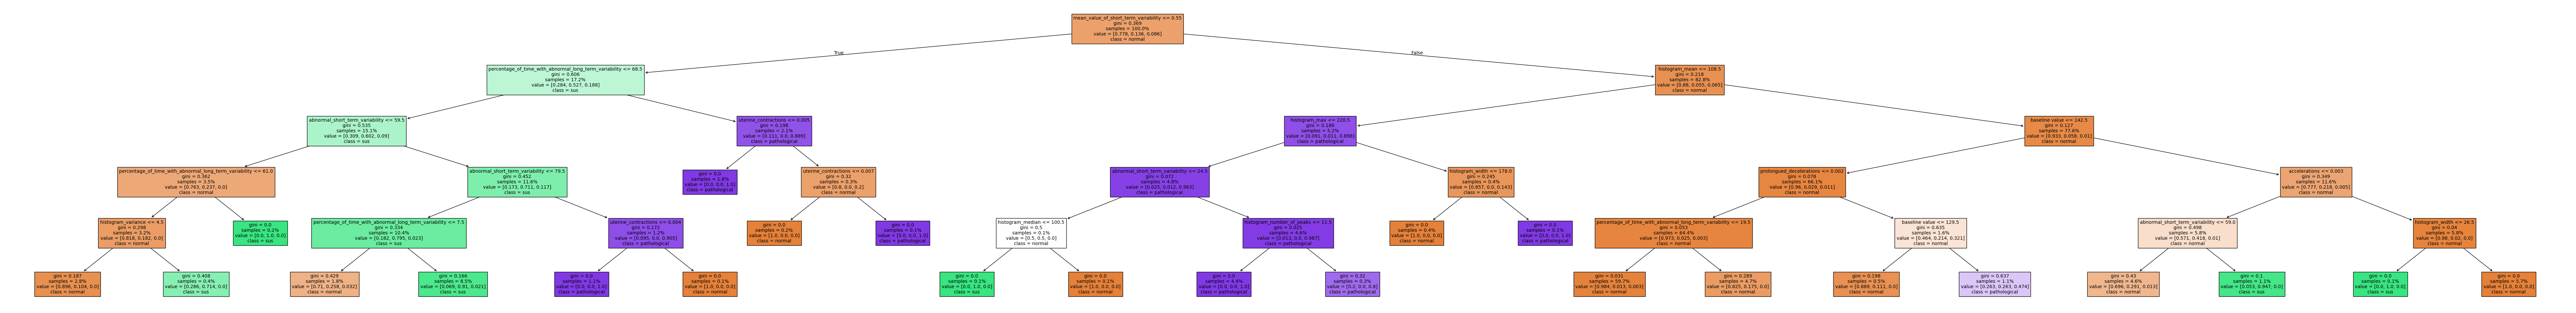

In [143]:
fig = plt.figure(figsize=(100,12))
_ = tree.plot_tree(model, 
                   feature_names=X_train.columns,  
                   class_names=['normal', 'sus', 'pathological'],
                   filled=True,
                   proportion=True,
                   fontsize=10)

# fig.savefig('mytree.png')

# Случайный лес (ансамбль решающих деревьев)

In [144]:
from sklearn.ensemble import RandomForestClassifier

In [145]:
model = RandomForestClassifier()

model.fit(X_train, y_train)

accuracy_score(y_test, model.predict(X_test))
# лучший показатель был 0.9295774647887324

0.9530516431924883

In [146]:
model = RandomForestClassifier(min_samples_split=15, 
                               min_samples_leaf=5,
                               criterion = "entropy",
                               min_impurity_decrease=0.005)

model.fit(X_train, y_train)

accuracy_score(y_test, model.predict(X_test))

0.9295774647887324

# Градиентный бустинг  
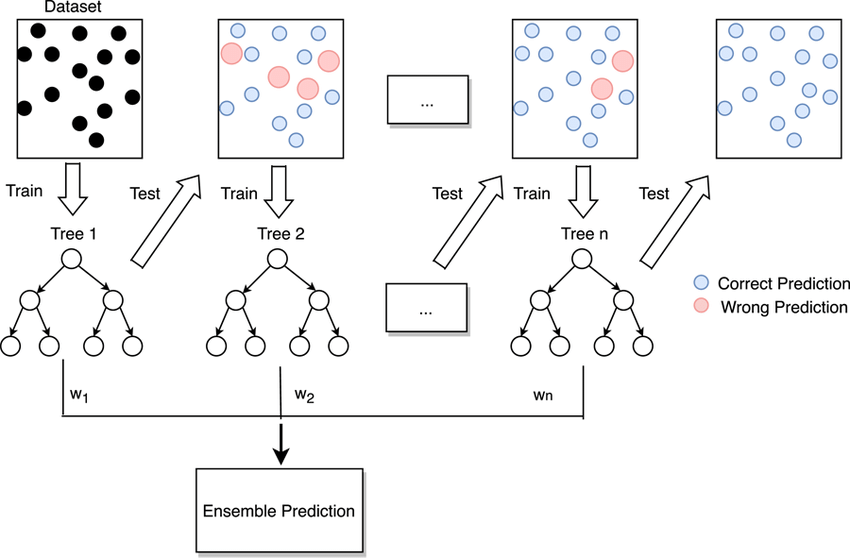

In [66]:
# !pip install catboost

In [155]:
from catboost import CatBoostClassifier

In [156]:
model = CatBoostClassifier(iterations=50, eval_metric='Accuracy')

In [157]:
model.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 0.8823529	total: 7.05ms	remaining: 345ms
1:	learn: 0.8964706	total: 14.9ms	remaining: 359ms
2:	learn: 0.9076471	total: 20.1ms	remaining: 315ms
3:	learn: 0.9158824	total: 24.9ms	remaining: 286ms
4:	learn: 0.9282353	total: 28.9ms	remaining: 260ms
5:	learn: 0.9311765	total: 33.2ms	remaining: 244ms
6:	learn: 0.9400000	total: 38.1ms	remaining: 234ms
7:	learn: 0.9400000	total: 42.7ms	remaining: 224ms
8:	learn: 0.9388235	total: 47ms	remaining: 214ms
9:	learn: 0.9405882	total: 50.9ms	remaining: 204ms
10:	learn: 0.9464706	total: 55.1ms	remaining: 195ms
11:	learn: 0.9476471	total: 60.2ms	remaining: 191ms
12:	learn: 0.9558824	total: 64.2ms	remaining: 183ms
13:	learn: 0.9558824	total: 68.9ms	remaining: 177ms
14:	learn: 0.9582353	total: 73.8ms	remaining: 172ms
15:	learn: 0.9588235	total: 78.8ms	remaining: 167ms
16:	learn: 0.9623529	total: 83.5ms	remaining: 162ms
17:	learn: 0.9635294	total: 87.3ms	remaining: 155ms
18:	learn: 0.9664706	total: 91.4ms	remaining: 149ms

In [158]:
accuracy_score(y_test, model.predict(X_test))

0.9624413145539906

In [175]:
model = CatBoostClassifier(iterations=50, 
                           learning_rate=0.5, 
                           eval_metric='Accuracy')

model.fit(X_train, y_train, 
          eval_set=(X_test, y_test),
          metric_period=5,
          early_stopping_rounds=20
)

0:	learn: 0.8823529	test: 0.8826291	best: 0.8826291 (0)	total: 7.01ms	remaining: 344ms
5:	learn: 0.9311765	test: 0.9366197	best: 0.9366197 (5)	total: 49.7ms	remaining: 364ms
10:	learn: 0.9464706	test: 0.9319249	best: 0.9366197 (5)	total: 74.9ms	remaining: 266ms
15:	learn: 0.9588235	test: 0.9366197	best: 0.9389671 (12)	total: 95ms	remaining: 202ms
20:	learn: 0.9670588	test: 0.9436620	best: 0.9436620 (20)	total: 118ms	remaining: 163ms
25:	learn: 0.9747059	test: 0.9483568	best: 0.9483568 (25)	total: 142ms	remaining: 132ms
30:	learn: 0.9770588	test: 0.9507042	best: 0.9507042 (27)	total: 165ms	remaining: 101ms
35:	learn: 0.9811765	test: 0.9530516	best: 0.9530516 (31)	total: 190ms	remaining: 74ms
40:	learn: 0.9852941	test: 0.9577465	best: 0.9577465 (40)	total: 217ms	remaining: 47.6ms
45:	learn: 0.9888235	test: 0.9600939	best: 0.9600939 (43)	total: 240ms	remaining: 20.9ms
49:	learn: 0.9900000	test: 0.9624413	best: 0.9624413 (46)	total: 260ms	remaining: 0us

bestTest = 0.9624413146
bestIterati

In [185]:
round(accuracy_score(y_test, model.predict(X_test)), 3)

0.962

# ДЗ: GridSeachCV
С помощью GridSearchCV определите наилучший сет параметров для дерева решений.  
Использовать для выбора:  
- разную глубину дерева (max_depth). Выбрать несколько чисел самостоятельно;  
- попробовать в качестве метрики использовать критерия использовать 'gini' и 'entropy'
- *опционально*: попробовать также параметры best и random для "splitter"

Использовать для GridSearchCV данные для обучения.  
После определения лучше модели получить её из соответвующего атрибута и проверить её скор на тестовой выборке.  
То есть последователньость шагов:  
- Разбить датасет на трейн и тест;  
- сделать гридсёрч на трейне;  
- определить лучшую модель;  
- сделать предсказания лучшей моделью для тестовой выборки и посчитать скор (точность, accuracy_score)  

ps: можете попробовать сделать гридсёрч для random forest, определив также оптимальный набор параметров (напр, число деревьев, критерий, *etc*)


In [73]:
# импорты

In [75]:
df = pd.read_csv('./data/fetal_health.csv') # чтение

In [ ]:
# ваш код